<a href="https://colab.research.google.com/github/Hyunseo-BA/BigData_Lab/blob/master/rnn_imdb_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RNN 모델을 이용한 영화리뷰 분류 분석

In [1]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb

from tensorflow.keras.preprocessing import sequence

### Step 1-1. Input tensor 와 Target tensor 준비(훈련데이터)

IMDB 영화 리뷰 데이터 down

In [2]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

### Step 1-2. 입력 데이터의 전처리

RNN 모델에 데이터를 입력하기 위해 시퀀스 데이터의 길이를 통일

In [3]:
input_train = sequence.pad_sequences(input_train, 800)
input_test = sequence.pad_sequences(input_test, 800)

In [4]:

input_train.shape, input_test.shape

((25000, 800), (25000, 800))

In [5]:
input_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

### Step2. RNN 모델 디자인

In [6]:
# embedding layer: 32차원, hidden layer : 1개[32], activation : tanh
model = models.Sequential()
model.add(layers.Embedding(input_dim=10000, output_dim=32))
model.add(layers.SimpleRNN(units=32))
model.add(layers.Dense(units=1, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


### Step 3. 모델의 학습 정보 설정

In [8]:
# loss : binary crossentropy/ optimizer : rmsprop/ metric : accuracy
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

### Step 4. 모델에 input, target 데이터 연결 후 학습

In [9]:
# batch size : 128, epochs : 10, validation data set percent : 20%
history = model.fit(
    x=input_train, y=y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.2
)

Epoch 1/10
157/157 [==============================] - 43s 263ms/step - loss: 0.6433 - accuracy: 0.6038 - val_loss: 0.4192 - val_accuracy: 0.8138
Epoch 2/10
157/157 [==============================] - 42s 270ms/step - loss: 0.3726 - accuracy: 0.8412 - val_loss: 0.4183 - val_accuracy: 0.8166
Epoch 3/10
157/157 [==============================] - 42s 264ms/step - loss: 0.2772 - accuracy: 0.8898 - val_loss: 0.4832 - val_accuracy: 0.8072
Epoch 4/10
157/157 [==============================] - 42s 266ms/step - loss: 0.2276 - accuracy: 0.9157 - val_loss: 0.3967 - val_accuracy: 0.8310
Epoch 5/10
157/157 [==============================] - 42s 265ms/step - loss: 0.1793 - accuracy: 0.9353 - val_loss: 0.4099 - val_accuracy: 0.8608
Epoch 6/10
157/157 [==============================] - 42s 266ms/step - loss: 0.1340 - accuracy: 0.9521 - val_loss: 0.3937 - val_accuracy: 0.8516
Epoch 7/10
157/157 [==============================] - 42s 268ms/step - loss: 0.0888 - accuracy: 0.9715 - val_loss: 0.4723 - val_ac

### Step 5. 학습과정의 시각화 및 성능 테스트

In [12]:
# 학습과정 시각화를 위한 정보 추출
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [13]:
# 차트의 x 축을 위한 epoch 정보 생성
epochs = range(1, len(acc) + 1)

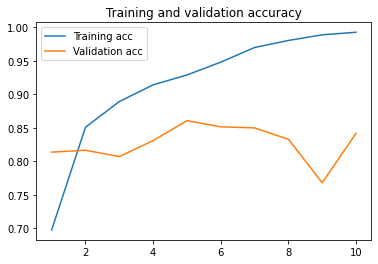

In [14]:
# 정합도 정보 시각화
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

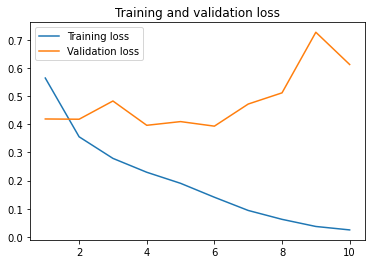

In [15]:
# loss 정보 시각화
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
test_loss, test_acc = model.evaluate(x=input_test, y=y_test)

782/782 [==============================] - 31s 40ms/step - loss: 0.6316 - accuracy: 0.8354
